#### subset the gene count information from `GeneCounts.txt`

In [18]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

genelist = pd.read_csv('genelist.txt', header=None, names=['Gene'])
gene_counts = pd.read_csv('GeneCounts.txt', delimiter='\t')
#print(genelist)

# Use the `genelist.txt` information to subset the gene count information from `GeneCounts.txt`
#(i.e. retrieve only the GeneCounts.txt data for the genes in genelist.txt.

subset_gene_counts = gene_counts[gene_counts['GeneID'].isin(genelist['Gene'])]
subset_gene_counts.to_csv("subset_gene_counts_file", sep='\t', encoding='utf-8', index=False, header=True)
#print(subset_gene_counts)


#### Subset the gene count information from (1) further by removing all genes that have 0 counts for all of their samples.

In [19]:
#subset_gene_counts = subset_gene_counts.loc[:, (subset_gene_counts != 0).any(axis=0)]
filtered_gene_counts = subset_gene_counts.loc[(subset_gene_counts.iloc[:, 1:] != 0).any(axis=1)]
filtered_gene_counts.to_csv("subset_gene_counts_file_nonzero", sep='\t', encoding='utf-8', index=False, header=True)
#print(filtered_gene_counts)

#### Apply principal component analysis (PCA)on the list from filtered_gene_counts and plot PC1 vs PC2 for all samples,

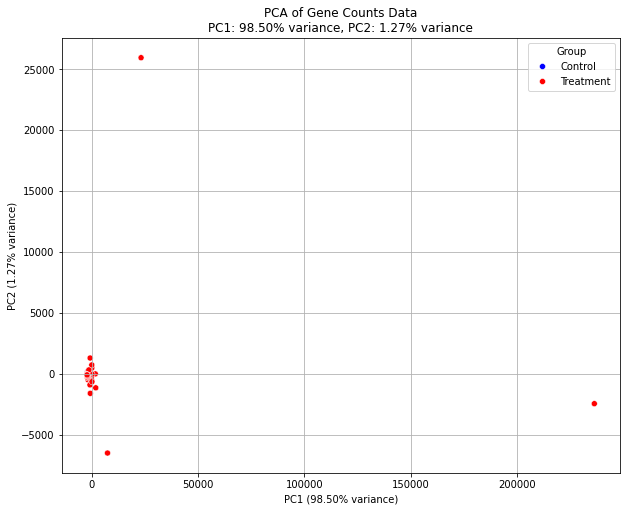

In [17]:

# Assuming filtered_gene_counts is already available from the previous steps
counts_data = filtered_gene_counts.drop('GeneID', axis=1)

# Apply PCA to the counts data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(counts_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Verify the number of samples
num_samples = pca_df.shape[0]

# Assign group labels based on the number of samples
control_size = min(12, num_samples // 2)  # Ensure we don't exceed the number of samples
treatment_size = num_samples - control_size
pca_df['Group'] = ['Control'] * control_size + ['Treatment'] * treatment_size

# Calculate the explained variance ratios
explained_variance = pca.explained_variance_ratio_

# Plot PC1 vs PC2 and color by group
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Group', data=pca_df, palette={'Control': 'blue', 'Treatment': 'red'})

# Add titles and labels with variance explained
plt.title(f'PCA of Gene Counts Data\nPC1: {explained_variance[0]:.2%} variance, PC2: {explained_variance[1]:.2%} variance')
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} variance)')

plt.legend(title='Group')
plt.grid(True)
plt.show()
